In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Bike columns
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals


# Load the data

In [154]:
bike_data = pd.read_csv('bikeshare_lyst7557.csv')

In [155]:
bike_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [156]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [157]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [158]:
bike_data['count'].count()

10886

In [159]:
bike_data['datetime'] = pd.to_datetime(bike_data['datetime'])

In [160]:
bike_data['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [161]:
bike_data['Year'] = bike_data['datetime'].dt.year

In [162]:
bike_data['Year'].head(2)

0    2011
1    2011
Name: Year, dtype: int64

In [163]:
bike_data['Month'] = bike_data['datetime'].dt.month

In [164]:
bike_data['Day'] = bike_data['datetime'].dt.day

In [165]:
bike_data['Hour'] = bike_data['datetime'].dt.hour

In [166]:
bike_data['Minute'] = bike_data['datetime'].dt.minute

In [167]:
bike_data['Seconds'] = bike_data['datetime'].dt.second

In [168]:
bike_data.drop('datetime', axis = 1,inplace = True)

In [169]:
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,Minute,Seconds
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [170]:
bike_data_copy = bike_data.copy()

In [171]:
bike_data_copy.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,Minute,Seconds
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


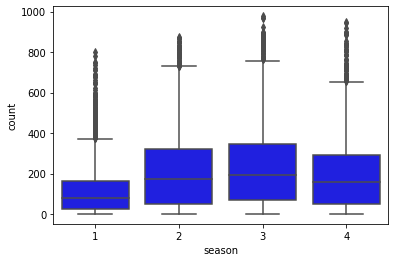

In [172]:
sns.boxplot(bike_data_copy['season'],bike_data_copy['count'],color='b')

In [173]:
bike_data_copy['season'] = bike_data_copy['season'].map({1:'spring', 2:'summer', 3:'fall', 4 :'winter' })

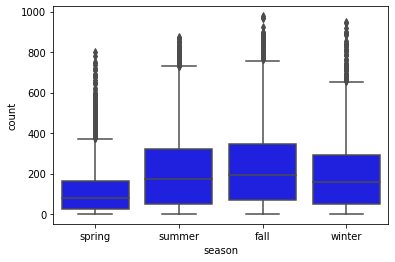

In [174]:
sns.boxplot(bike_data_copy['season'],bike_data_copy['count'],color='b')

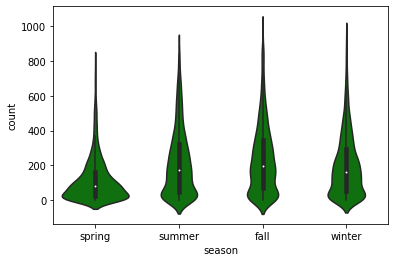

In [175]:
sns.violinplot(bike_data_copy['season'],bike_data_copy['count'],color ='g')
              

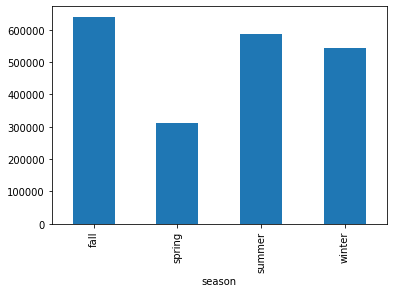

In [176]:
bike_data_copy.groupby('season')['count'].sum().plot.bar()

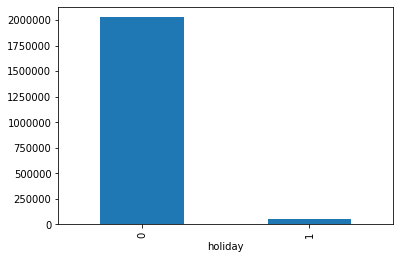

In [177]:
bike_data_copy.groupby('holiday')['count'].sum().plot.bar()

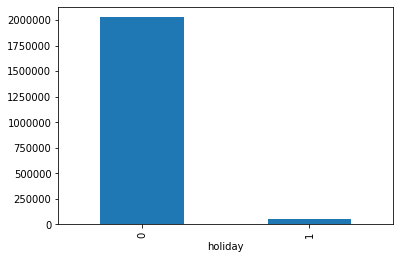

In [178]:
#bike_data_copy['holiday'] = bike_data_copy['holiday'].map({1:'Holiday',0:'No_Holiday'})

bike_data_copy.groupby('holiday')['count'].sum().plot.bar()

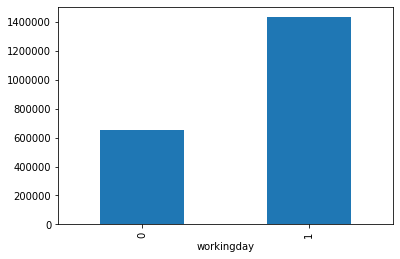

In [179]:
bike_data_copy.groupby('workingday')['count'].sum().plot.bar()